In [1]:
import pandas as pd

# Đọc dữ liệu
retail_data = pd.read_excel("C:/Users/Admin/Downloads/Online Retail.xlsx/Online Retail.xlsx")

# Chọn các cột quan trọng
retail_data = retail_data[['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice', 'Country']]

# Tạo biến doanh thu (TotalPrice) 
retail_data['TotalPrice'] = retail_data['Quantity'] * retail_data['UnitPrice']

# Hiển thị 5 dòng đầu tiên
retail_data.head()


,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,3.39,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom,20.34


# Chuẩn bị 

# Histogram – Phân bố doanh thu

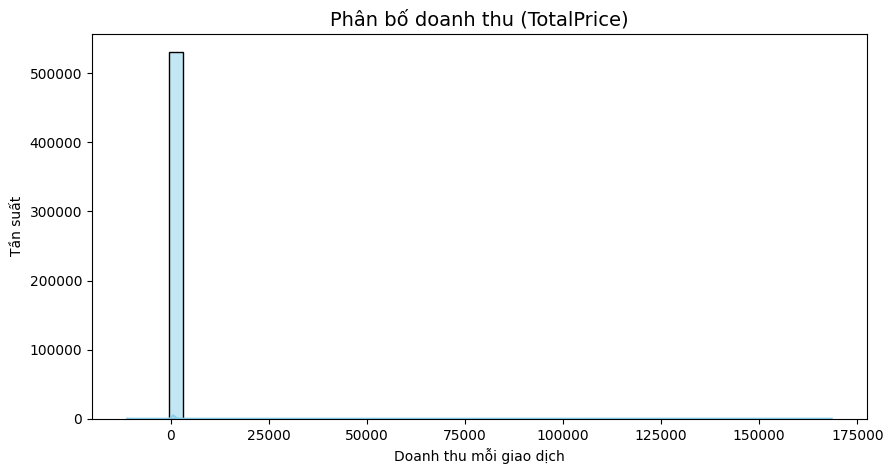

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(retail['TotalPrice'], bins=50, color='skyblue', kde=True)
plt.title('Phân bố doanh thu (TotalPrice)', fontsize=14)
plt.xlabel('Doanh thu mỗi giao dịch')
plt.ylabel('Tần suất')
plt.show()


# Bar Chart – Top 10 quốc gia có doanh thu cao nhất

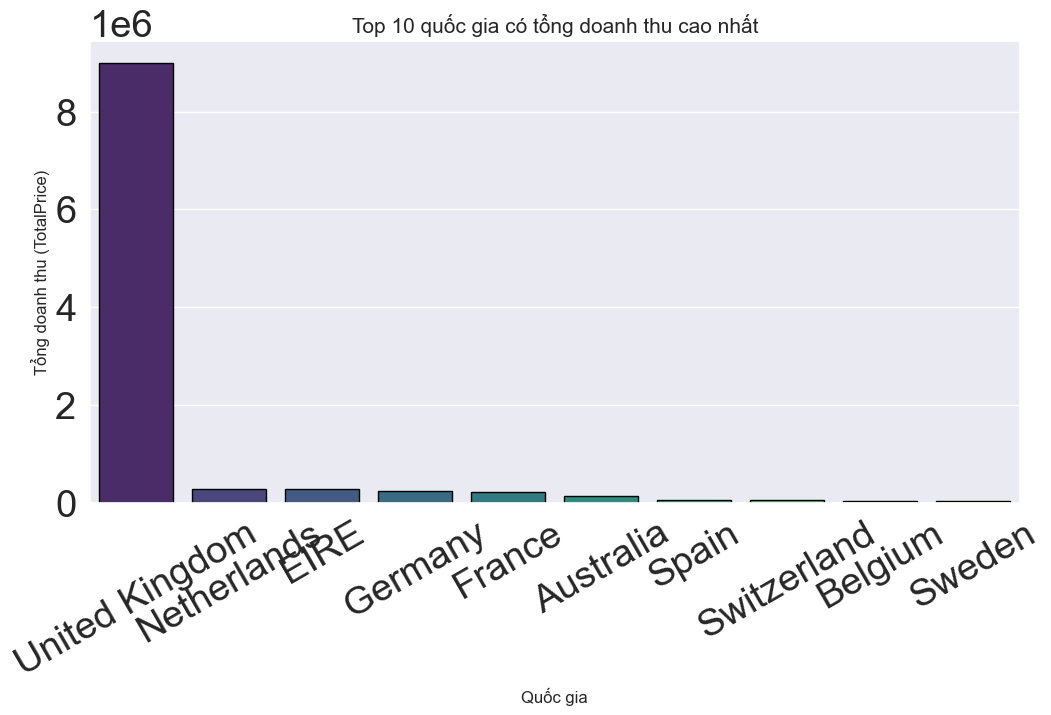

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tổng doanh thu theo quốc gia
country_sales = retail.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=country_sales.index, y=country_sales.values, hue=country_sales.index, palette='viridis', edgecolor='black', legend=False)
plt.title('Top 10 quốc gia có tổng doanh thu cao nhất', fontsize=15)
plt.xlabel('Quốc gia', fontsize=12)
plt.ylabel('Tổng doanh thu (TotalPrice)', fontsize=12)
plt.xticks(rotation=30)
plt.show()

# Bar Chart – Top 10 sản phẩm bán chạy nhất

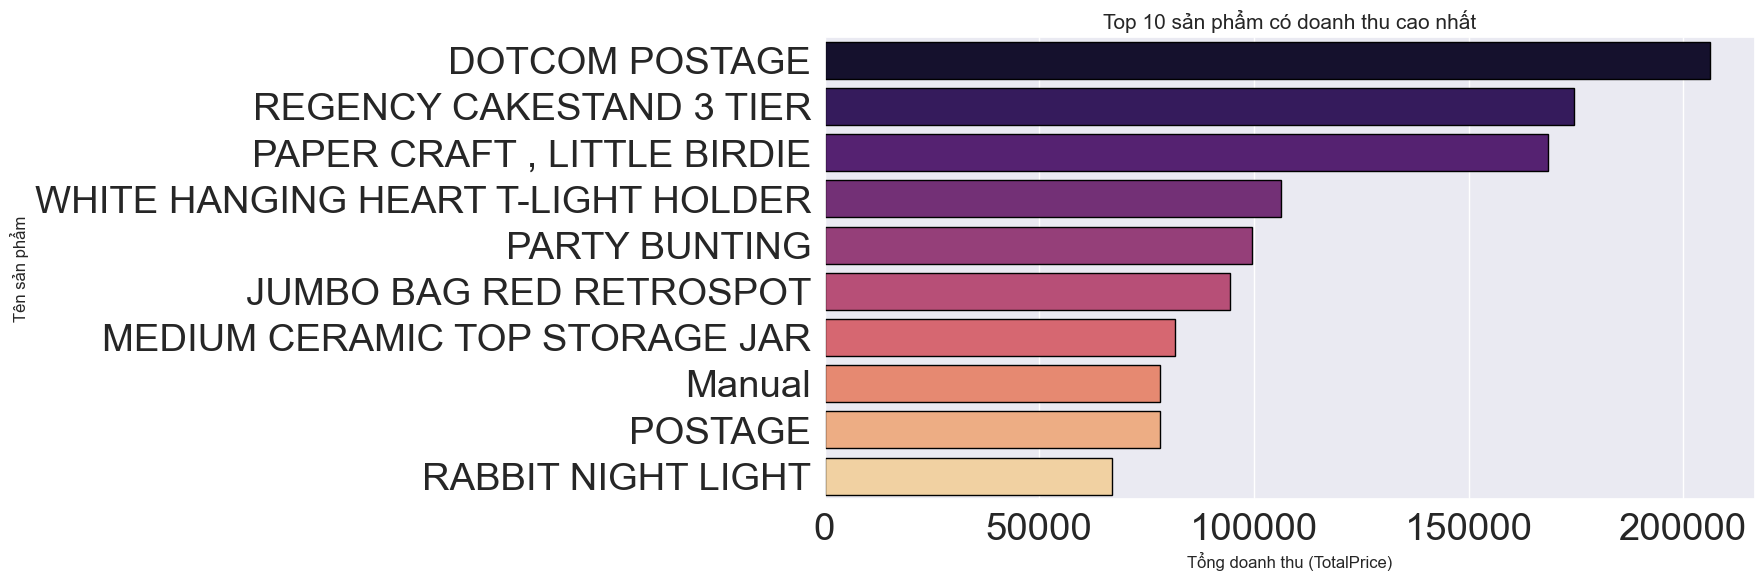

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tổng doanh thu theo sản phẩm
product_sales = retail.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=product_sales.values, y=product_sales.index, hue=product_sales.index, palette='magma', edgecolor='black', legend=False)
plt.title('Top 10 sản phẩm có doanh thu cao nhất', fontsize=15)
plt.xlabel('Tổng doanh thu (TotalPrice)', fontsize=12)
plt.ylabel('Tên sản phẩm', fontsize=12)
plt.show()

# Plotly – Biểu đồ tương tác doanh thu

In [7]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook_connected"

# Doanh thu theo quốc gia (Top 10)
country_df = retail.groupby('Country', as_index=False)['TotalPrice'].sum().sort_values('TotalPrice', ascending=False).head(10)
fig1 = px.bar(
    country_df,
    x='Country', y='TotalPrice',
    title='Top 10 quốc gia có doanh thu cao nhất (Biểu đồ tương tác)',
    color='TotalPrice', color_continuous_scale='Viridis'
)
fig1.show()

# Doanh thu theo sản phẩm (Top 10)
product_df = retail.groupby('Description', as_index=False)['TotalPrice'].sum().sort_values('TotalPrice', ascending=False).head(10)
fig2 = px.bar(
    product_df,
    x='Description', y='TotalPrice',
    title='Top 10 sản phẩm bán chạy nhất (Biểu đồ tương tác)',
    color='TotalPrice', color_continuous_scale='Magma'
)
fig2.show()


# MatplotlibMatplotlib

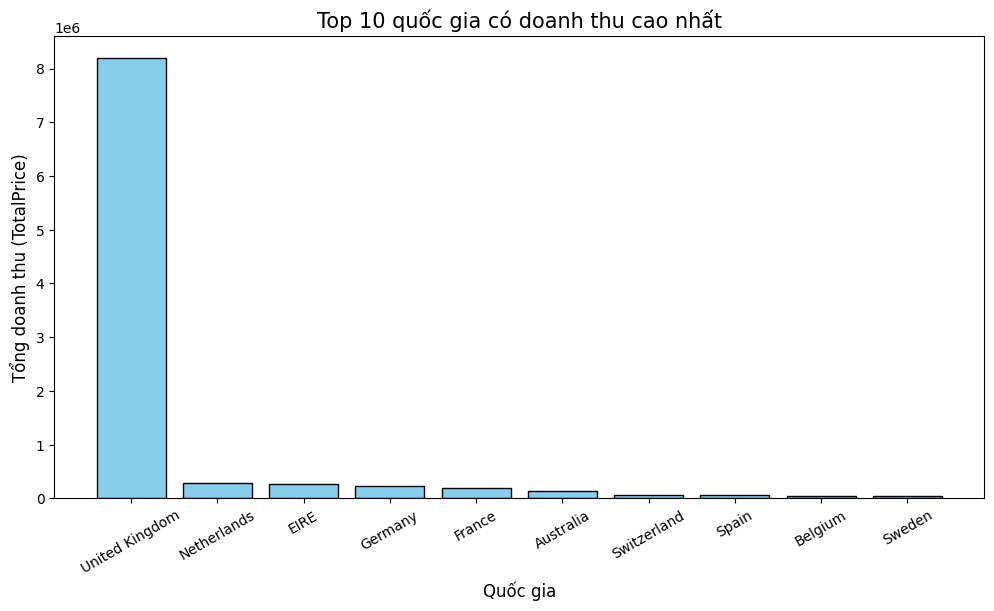

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu
retail_data = pd.read_excel("C:/Users/Admin/Downloads/Online Retail.xlsx/Online Retail.xlsx")

# Tạo biến doanh thu
retail_data['TotalPrice'] = retail_data['Quantity'] * retail_data['UnitPrice']

# Tính tổng doanh thu theo quốc gia
country_sales = retail_data.groupby('Country')['TotalPrice'].sum().reset_index()

# Sắp xếp giảm dần theo doanh thu
retail_sorted = country_sales.sort_values('TotalPrice', ascending=False)

# case 1: basic
plt.figure(figsize=(12,6))
x = retail_sorted['Country'][:10]
y = retail_sorted['TotalPrice'][:10]

plt.bar(x, y, color='skyblue', edgecolor='black')
plt.title('Top 10 quốc gia có doanh thu cao nhất', fontsize=15)
plt.xlabel('Quốc gia', fontsize=12)
plt.ylabel('Tổng doanh thu (TotalPrice)', fontsize=12)
plt.xticks(rotation=30)
plt.show()


# Case 2

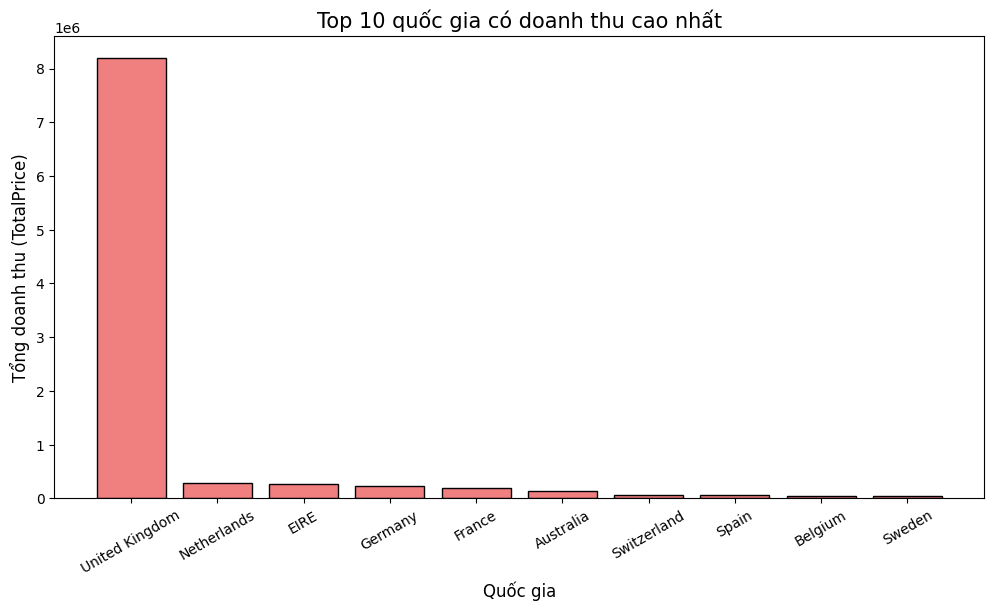

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu
retail_data = pd.read_excel("C:/Users/Admin/Downloads/Online Retail.xlsx/Online Retail.xlsx")

# Tạo biến doanh thu
retail_data['TotalPrice'] = retail_data['Quantity'] * retail_data['UnitPrice']

# Tính tổng doanh thu theo quốc gia
country_sales = retail_data.groupby('Country')['TotalPrice'].sum().reset_index()

# Sắp xếp giảm dần theo doanh thu
retail_sorted = country_sales.sort_values('TotalPrice', ascending=False)

# Chọn top 10 quốc gia
x = retail_sorted['Country'][:10]
y = retail_sorted['TotalPrice'][:10]

# case 2: advanced 1
plt.figure(figsize=(12,6))
plt.bar(x, y, color='lightcoral', edgecolor='black')
plt.title('Top 10 quốc gia có doanh thu cao nhất', fontsize=15)
plt.xlabel('Quốc gia', fontsize=12)
plt.xticks(fontsize=10, rotation=30)
plt.ylabel('Tổng doanh thu (TotalPrice)', fontsize=12)
plt.yticks(fontsize=10)
plt.show()


# Case 3

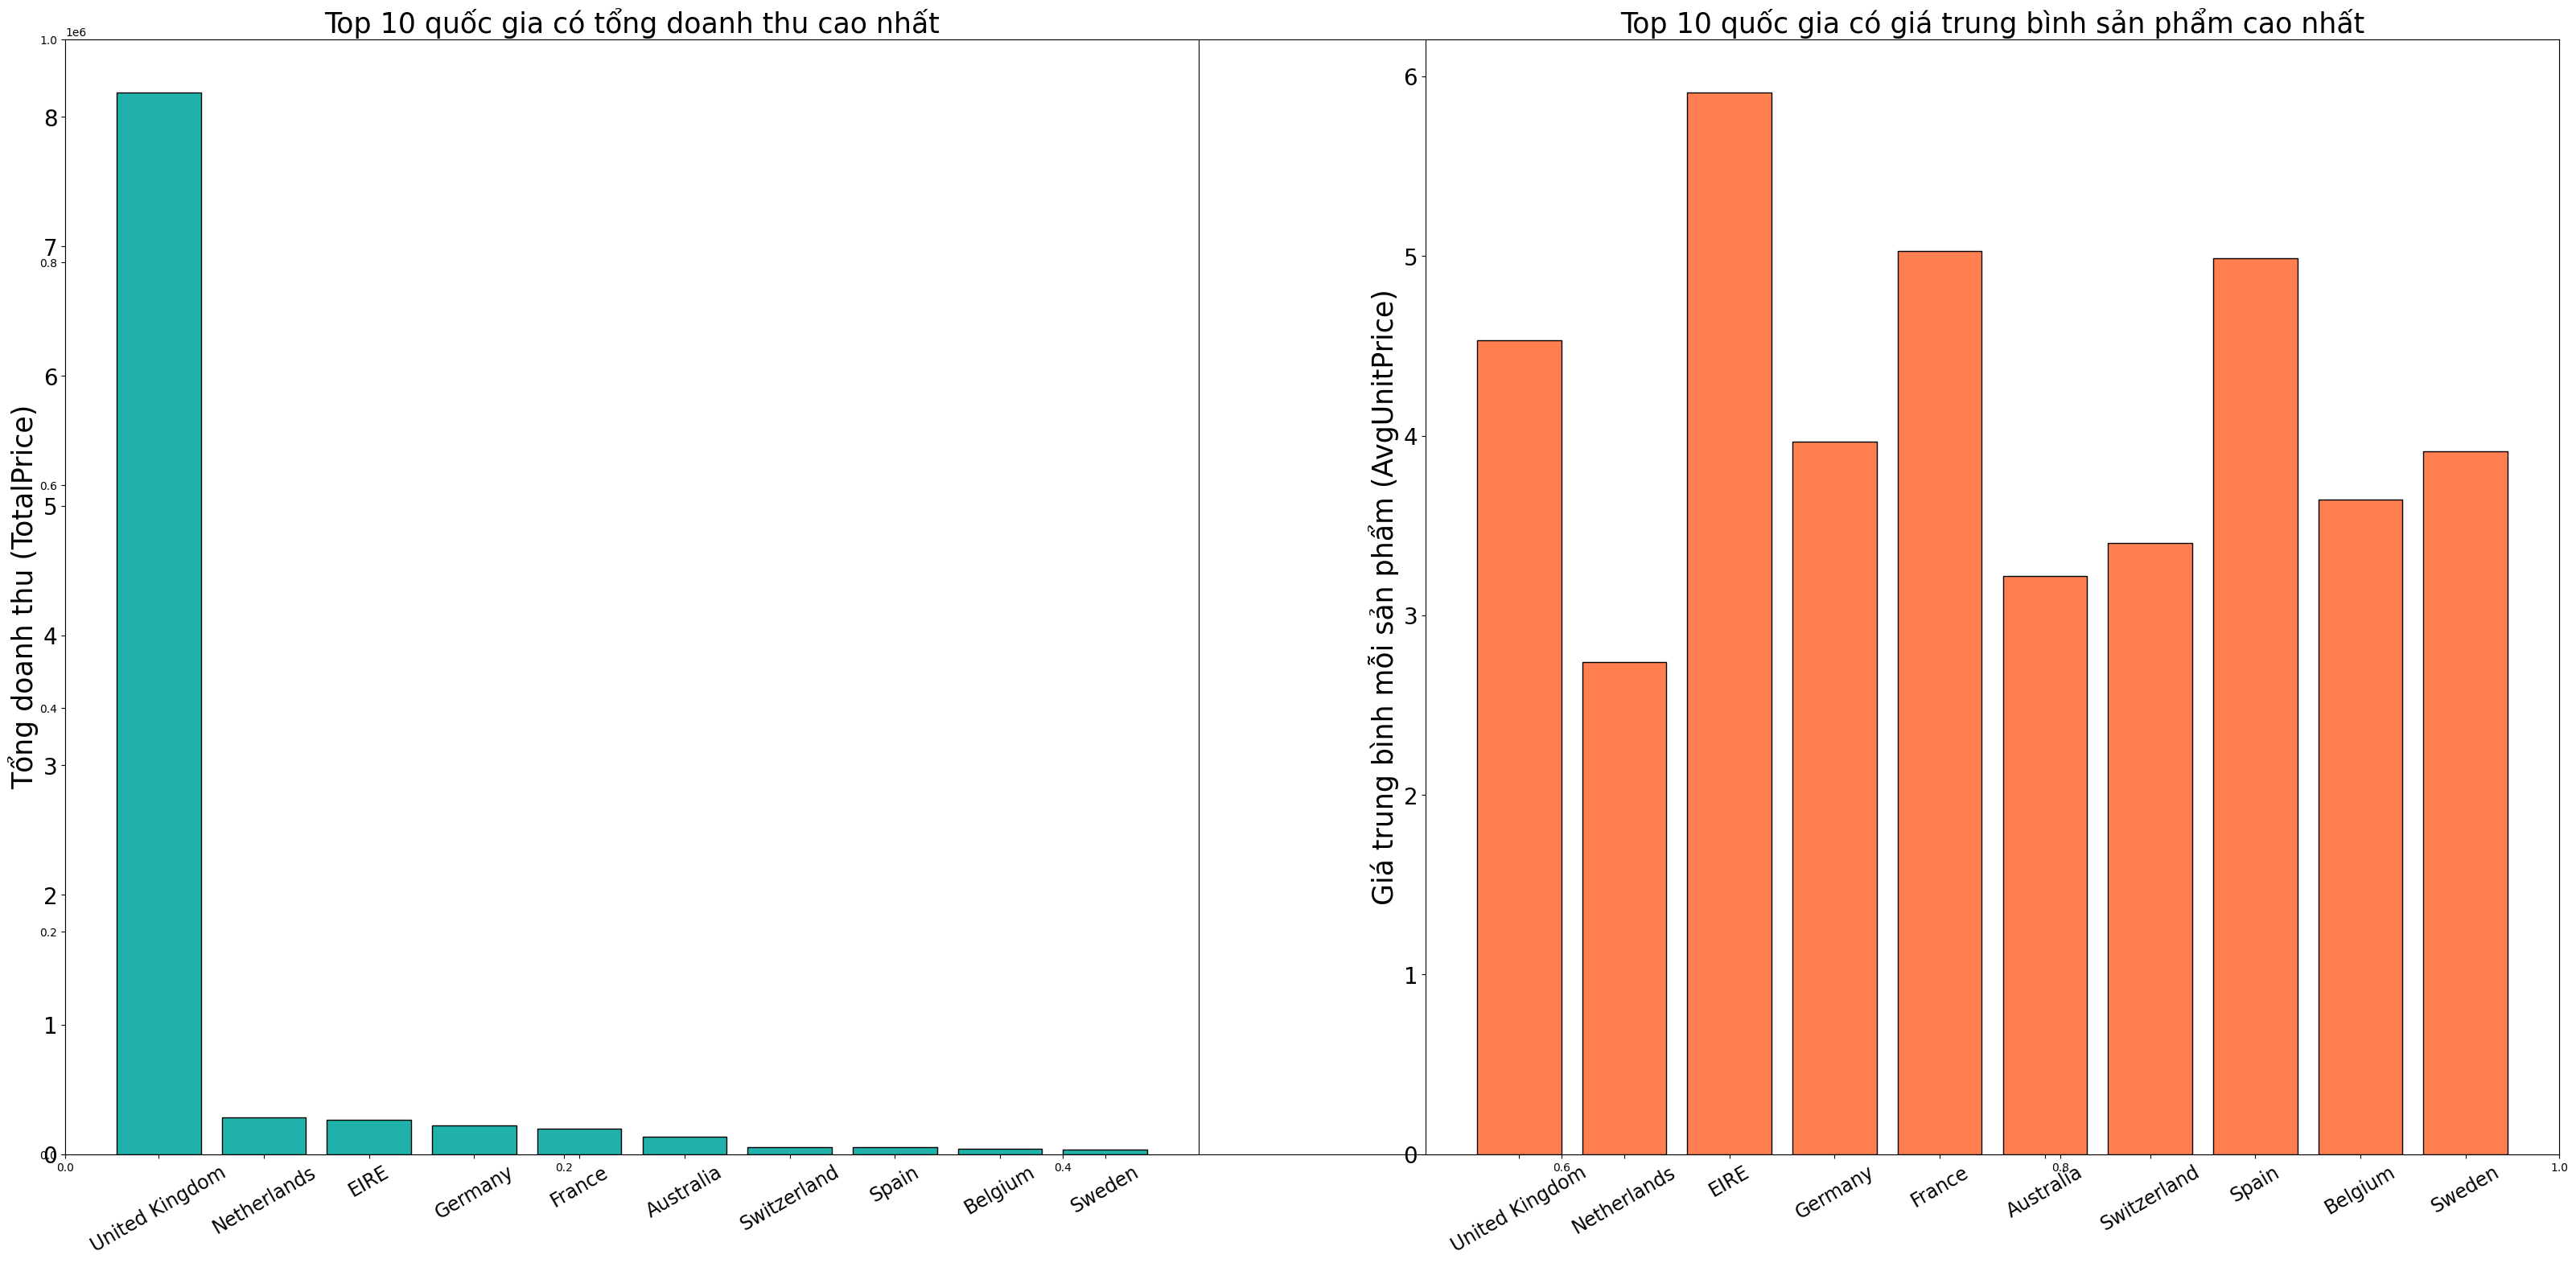

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu
retail_data = pd.read_excel("C:/Users/Admin/Downloads/Online Retail.xlsx/Online Retail.xlsx")

# Tạo biến doanh thu
retail_data['TotalPrice'] = retail_data['Quantity'] * retail_data['UnitPrice']

# Tính tổng doanh thu và giá trung bình theo quốc gia
country_stats = retail_data.groupby('Country').agg({
    'TotalPrice': 'sum',
    'UnitPrice': 'mean'
}).reset_index().rename(columns={'UnitPrice': 'AvgUnitPrice'})

# Sắp xếp theo doanh thu giảm dần
retail_sorted = country_stats.sort_values('TotalPrice', ascending=False)

# Lấy dữ liệu top 10
x = retail_sorted['Country'][:10]
y = retail_sorted['TotalPrice'][:10]
y1 = retail_sorted['AvgUnitPrice'][:10]

# case 3: advanced 2
fig, ax = plt.subplots(figsize=(40,18))
plt.subplot(1,2,1)
plt.bar(x, y, color='lightseagreen', edgecolor='black')
plt.xticks(fontsize=17, rotation=30)
plt.ylabel('Tổng doanh thu (TotalPrice)', fontsize=25)
plt.yticks(fontsize=20)
plt.title('Top 10 quốc gia có tổng doanh thu cao nhất', fontsize=25)

plt.subplot(1,2,2)
plt.bar(x, y1, color='coral', edgecolor='black')
plt.xticks(fontsize=17, rotation=30)
plt.ylabel('Giá trung bình mỗi sản phẩm (AvgUnitPrice)', fontsize=25)
plt.yticks(fontsize=20)
plt.title('Top 10 quốc gia có giá trung bình sản phẩm cao nhất', fontsize=25)

plt.show()


# Seaborn

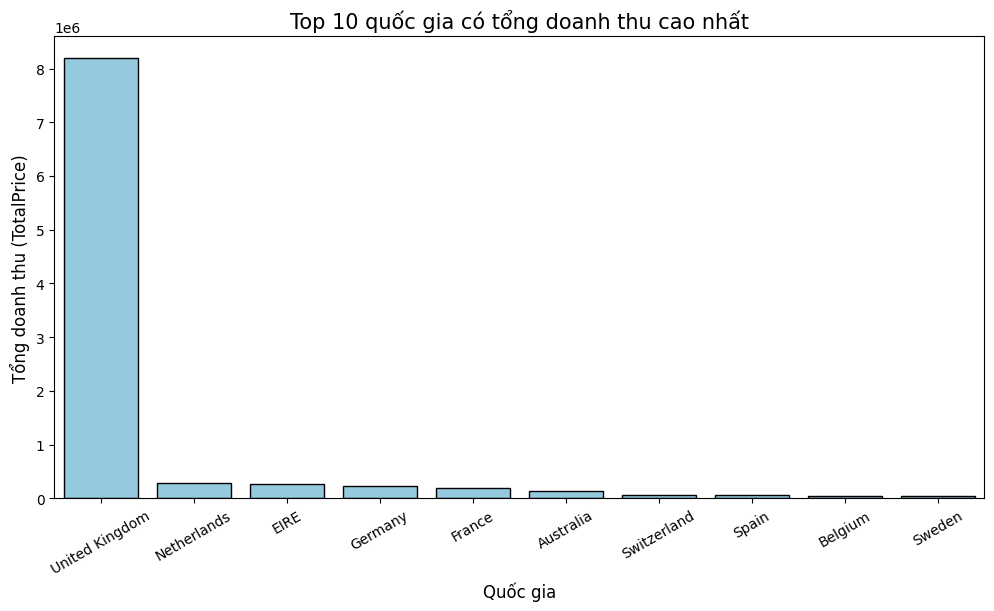

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Tạo biến doanh thu (tương tự PriceperSqm)
retail_data['TotalPrice'] = retail_data['Quantity'] * retail_data['UnitPrice']

# Tính tổng doanh thu theo quốc gia
country_sales = retail_data.groupby('Country')['TotalPrice'].sum().reset_index()

# Sắp xếp giảm dần
retail_sorted = country_sales.sort_values('TotalPrice', ascending=False)

# case 1: basic
plt.figure(figsize=(12,6))
data = retail_sorted[0:10]
sns.barplot(data=data, x='Country', y='TotalPrice', color='skyblue', edgecolor='black')
plt.title('Top 10 quốc gia có tổng doanh thu cao nhất', fontsize=15)
plt.xlabel('Quốc gia', fontsize=12)
plt.ylabel('Tổng doanh thu (TotalPrice)', fontsize=12)
plt.xticks(rotation=30)
plt.show()


# Case 2

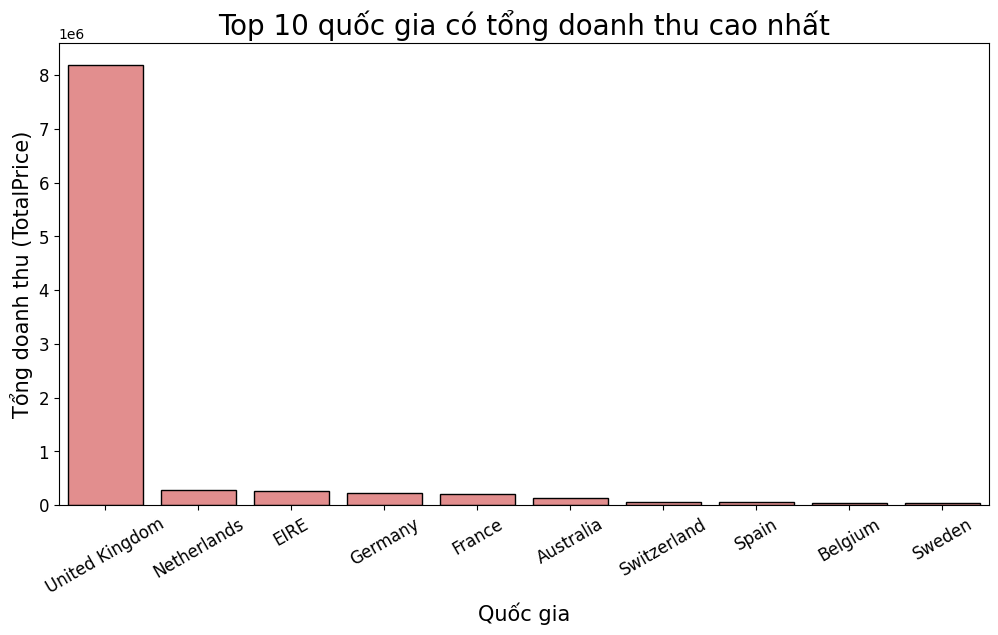

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Tạo biến doanh thu
retail_data['TotalPrice'] = retail_data['Quantity'] * retail_data['UnitPrice']

# Tính tổng doanh thu theo quốc gia
country_sales = retail_data.groupby('Country')['TotalPrice'].sum().reset_index()

# Sắp xếp giảm dần
retail_sorted = country_sales.sort_values('TotalPrice', ascending=False)

# Lấy 10 quốc gia có doanh thu cao nhất
data = retail_sorted[0:10]

# case 2: advanced 1
plt.figure(figsize=(12,6))
ax = sns.barplot(data=data, x='Country', y='TotalPrice', color='lightcoral', edgecolor='black')

# Gắn nhãn & định dạng biểu đồ
ax.set_xlabel('Quốc gia', fontsize=15)
ax.set_ylabel('Tổng doanh thu (TotalPrice)', fontsize=15)
ax.set_title('Top 10 quốc gia có tổng doanh thu cao nhất', fontsize=20)
plt.xticks(fontsize=12, rotation=30)
plt.yticks(fontsize=12)
plt.show()


# Case 3

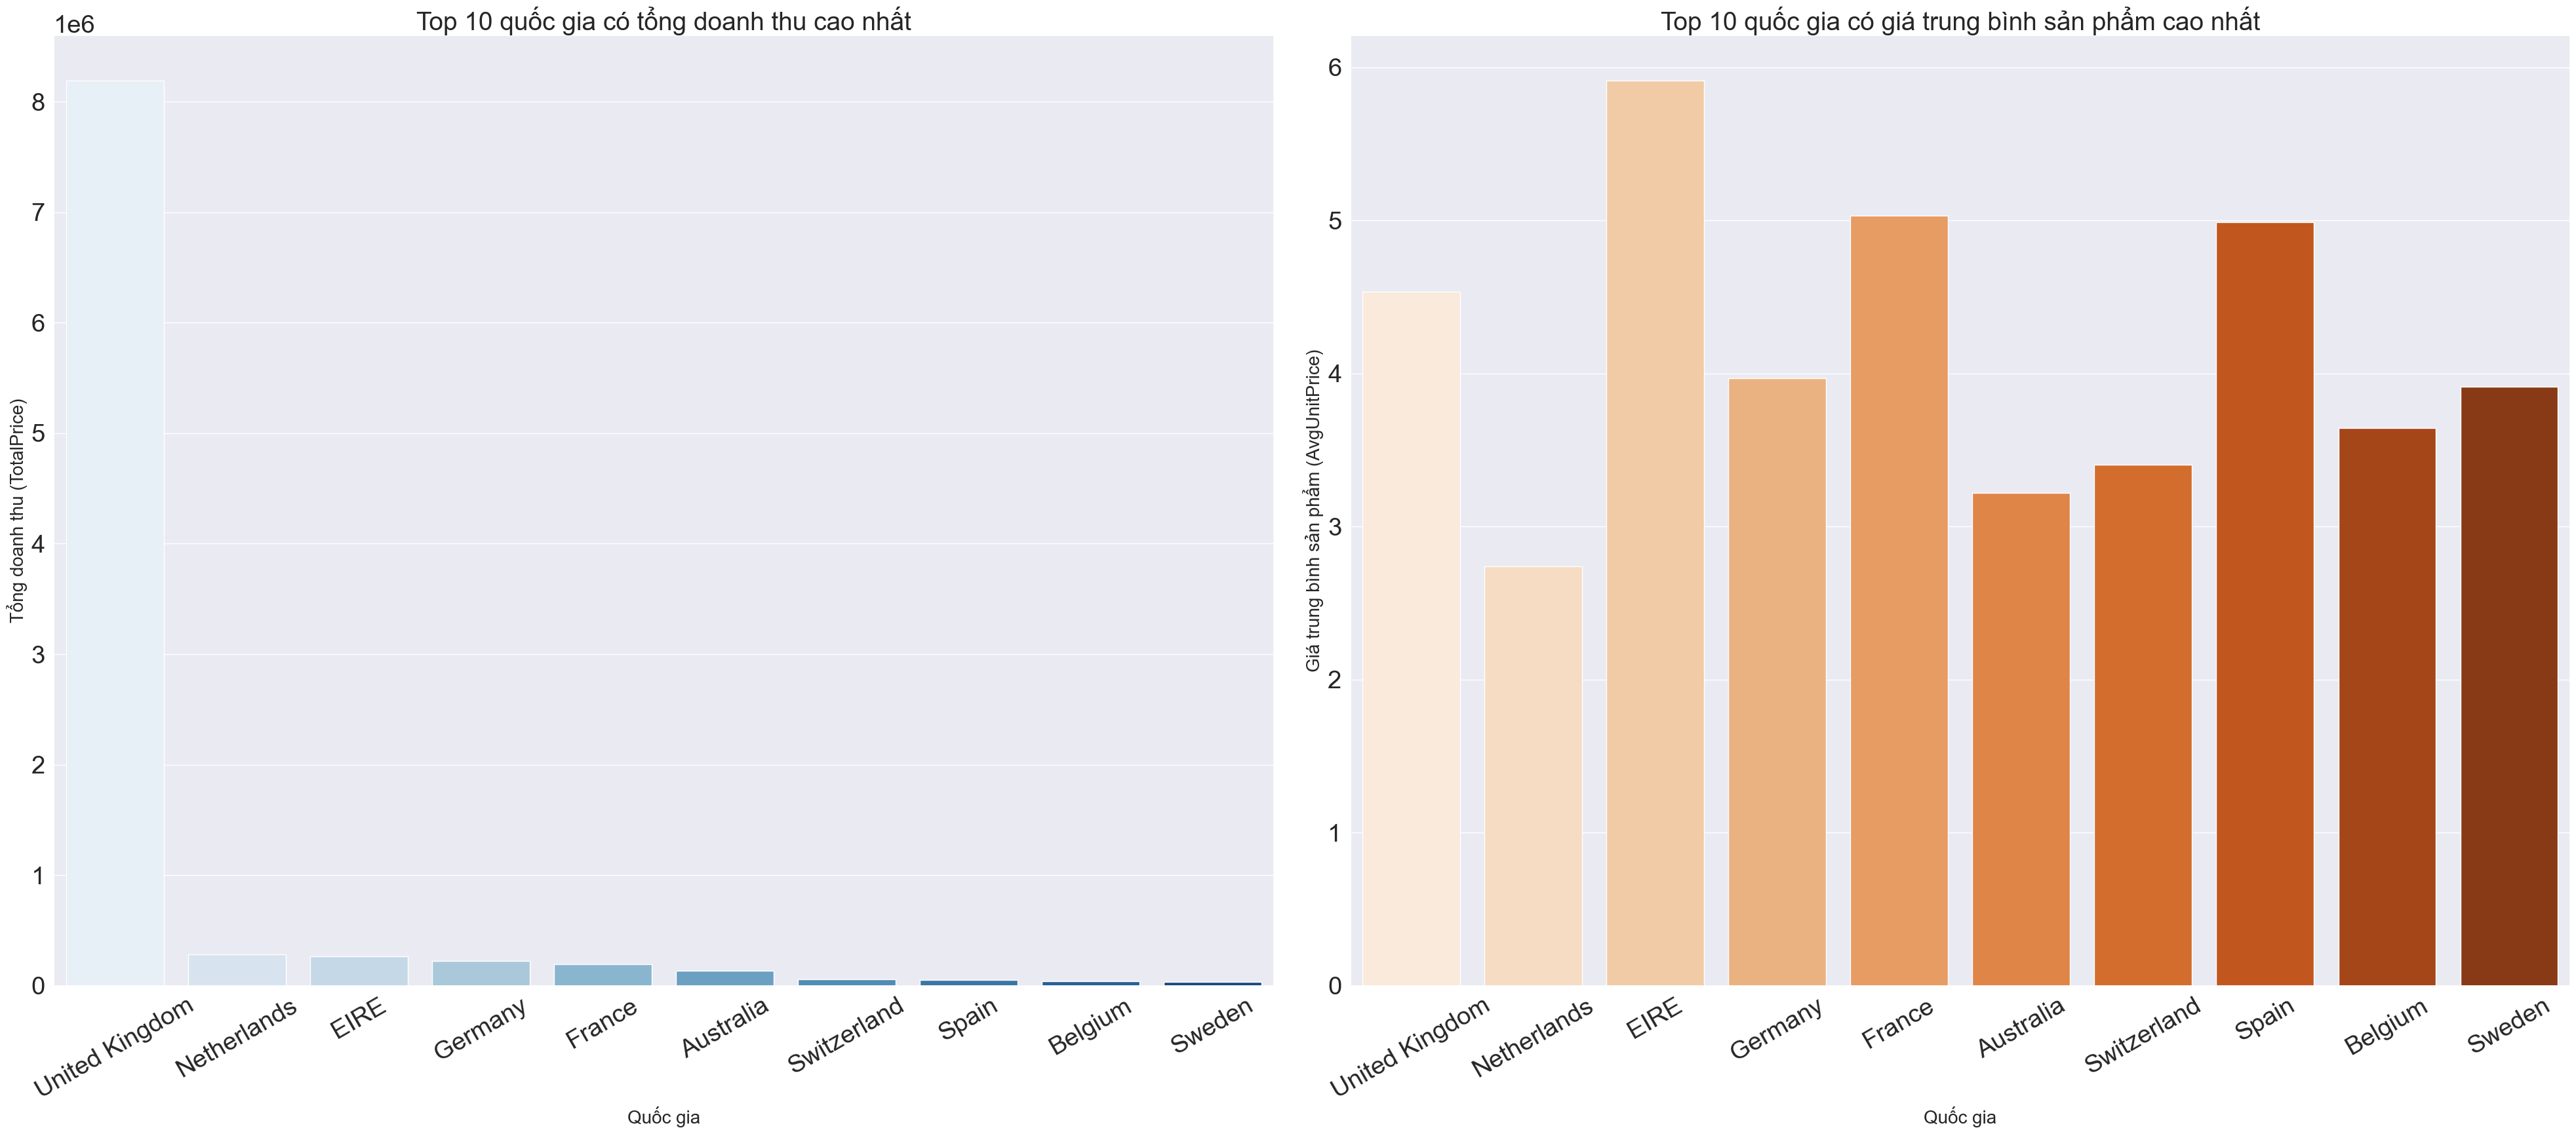

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo biến doanh thu
retail_data['TotalPrice'] = retail_data['Quantity'] * retail_data['UnitPrice']

# Tính tổng doanh thu và giá trung bình mỗi sản phẩm theo quốc gia
country_stats = retail_data.groupby('Country').agg({
    'TotalPrice': 'sum',
    'UnitPrice': 'mean'
}).reset_index().rename(columns={'UnitPrice': 'AvgUnitPrice'})

# Sắp xếp giảm dần theo doanh thu
retail_sorted = country_stats.sort_values('TotalPrice', ascending=False)

# Chọn top 10 quốc gia
data = retail_sorted.head(10)

# case 3: view multiple perspectives at once
fig, ax = plt.subplots(1, 2, figsize=(40, 18))
sns.set(font_scale=2.5)

# Biểu đồ 1 – Tổng doanh thu
ax1 = sns.barplot(data=data, x='Country', y='TotalPrice', hue='Country', palette='Blues', ax=ax[0], legend=False)
ax1.set_xlabel('Quốc gia', fontsize=20)
ax1.set_ylabel('Tổng doanh thu (TotalPrice)', fontsize=20)
ax1.set_title('Top 10 quốc gia có tổng doanh thu cao nhất', fontsize=28)
ax1.tick_params(axis='x', rotation=30)

# Biểu đồ 2 – Giá trung bình sản phẩm
ax2 = sns.barplot(data=data, x='Country', y='AvgUnitPrice', hue='Country', palette='Oranges', ax=ax[1], legend=False)
ax2.set_xlabel('Quốc gia', fontsize=20)
ax2.set_ylabel('Giá trung bình sản phẩm (AvgUnitPrice)', fontsize=20)
ax2.set_title('Top 10 quốc gia có giá trung bình sản phẩm cao nhất', fontsize=28)
ax2.tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()